# 군집화

## K-means 군집화

*   n_clusters = 군집의 개수를 정하는 파라미터
*   max_iter = 최대 반복횟수



---



**주요 속성**
- labels_ : 각 데이터 포인트가 속한 군집 중심 레이블(군집번호)
- cluster_centers : 각 군집의 중심점 좌표



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 군집의 개수를 정해준다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# 기존 데이터프레임에 타겟변수와 새로만든 군집 추가
df['target'] = iris.target
df['cluster'] = kmeans.labels_

# groupby로 실제와 군집의 차이 확인
result = df.groupby(by=['target','cluster']).count()[['sepal length (cm)']]
result

sepal length (cm)
target cluster                   
0      0                       50
1      1                       48
       2                        2
2      1                       14
       2                       36

In [ ]:
# 군집의 중심 정보(어떠한 성향을 갖는지 확인)
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# 군집화 시각화(위 예제에서는 4개의 피처이므로 PCA를 통해 2개로 축소 후 2차원 평면에서 시각화 표현)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head()
# 차원축소 후의 좌표 데이터프레임에 병합

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


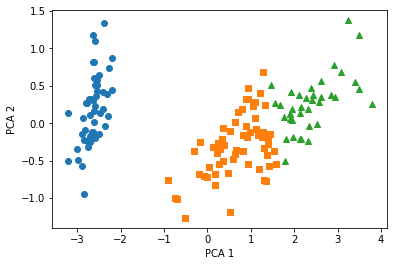

In [ ]:
mark0 = df[df['cluster']==0].index
mark1 = df[df['cluster']==1].index
mark2 = df[df['cluster']==2].index

plt.scatter(x=df.loc[mark0, 'pca_x'], y=df.loc[mark0,'pca_y'], marker='o')
plt.scatter(x=df.loc[mark1, 'pca_x'], y=df.loc[mark1,'pca_y'], marker='s')
plt.scatter(x=df.loc[mark2, 'pca_x'], y=df.loc[mark2,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
# make_blob()을 이용해 데이터 생성하고 군집해보기
# 자체적으로 데이터 만들어서 군집화 

from sklearn.datasets import make_blobs

# 군집을 수행할 데이터 생성, X - 데이터셋, y - 타겟
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

# 가공에 쉽게 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=['ftr1','ftr2'])
df['target'] = y
df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


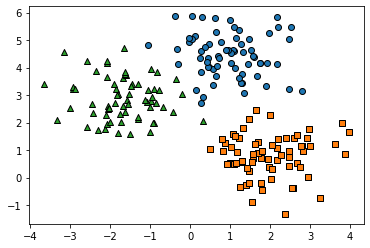

In [ ]:
# 만들어진 데이터 시각화


markers = ['o','s','^','P','D','H','x']
# np.unique(y)는 만든데이터에서 centers가 3이었으니까 (0,1,2)
for target in list(np.unique(y)):
  target_cluster = df[df['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[target], edgecolors='k')
plt.show()

In [ ]:
# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, max_iter=200, random_state=0)

# fit_predict하면 각각의 데이터에 대한 군집번호 출력
cluster_labels = kmeans.fit_predict(X)
df['label'] = cluster_labels

# 중심위치 좌표시각화를 위해 중심위치 추출
centers = kmeans.cluster_centers_

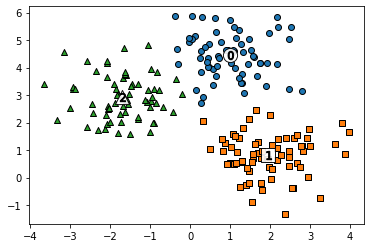

In [ ]:
markers = ['o','s','^','P','D','H','x']

for label in list(np.unique(cluster_labels)):
  label_cluster = df[df['label']==label]
  centers_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker=markers[label], edgecolors='k')

  # 군집별 중심위치 시각화
  plt.scatter(x=centers_x_y[0], y=centers_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
  plt.scatter(x=centers_x_y[0], y=centers_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(df.groupby('target')['label'].value_counts())

target  label
0       0        66
        2         1
1       1        67
2       2        65
        1         1
Name: label, dtype: int64


In [ ]:
centers

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

## 군집평가

- 실루엣 분석 ( 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄)
- silhouette_score()의 값은 0 ~ 1사이의 값을 가지며 1에 가까울수록 좋음
- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는게 중요

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
df['label'] = kmeans.labels_

# 모든 개별 데이터에 실루엣 계수 값 구함
score_sample = silhouette_samples(iris.data, df['label'])
print('실루엣 샘플의 shape : ', score_sample.shape)

df['s_coef'] = score_sample

avg_score = silhouette_score(iris.data, df['label'])
print('붓꽃 데이터세트 실루엣 스코어 : {0:.3f}'.format(avg_score))
print('\n군집별 평균\n', df.groupby('label')['s_coef'].mean())

실루엣 샘플의 shape :  (150,)
붓꽃 데이터세트 실루엣 스코어 : 0.553

군집별 평균
 label
0    0.451105
1    0.798140
2    0.417320
Name: s_coef, dtype: float64


In [38]:
# 최적 K를 찾는 방법(실루엣 스코어로 해봄)
best_score = -1
best_k=0

for i in range(2,6) :
  kmeans = KMeans(n_clusters=i, random_state=156).fit(df)
  df['label'] = kmeans.labels_
  avg_score = silhouette_score(iris.data, df['label'])
  score_sample = silhouette_samples(iris.data, df['label'])
  if avg_score > best_score :
    best_score = avg_score
    best_k = i
    df['s_coef'] = score_sample
    df['label1'] = kmeans.labels_

print('best K = ', best_k)
print('best_score = {0:.3f}'.format(best_score))
print('\n군집별 평균\n', df.groupby('label1')['s_coef'].mean())

best K =  2
best_score = 0.686

군집별 평균
 label1
0    0.621920
1    0.809767
Name: s_coef, dtype: float64


In [ ]:
df['label']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: label, Length: 150, dtype: int32

## 평균이동

- 중심을 데이터가 모여있는 밀도가 가장 높은곳으로 이동시킴
- 확률밀도함수를 사용
- 주어진 모델의 확률밀도함수를 찾기 위해 KDE(Kernel Density Estimation)를 이용함, 대표적으로 가우시안 분포 함수 사용
- 군집의 개수를 지정하지 않고 오직 대역폭(bandwidth)의 크기에 따라 군집화를 수행
- 장점 : 가정을 하지 않기 때문에 유연한 군집화 가능, 이상치 영향력도 크지 않고 군집의 개수 정하지 않아도 됌
- 단점 : 수행시간이 오래걸리고 bandwidth의 크기에 따라 군집화 영향도가 매우 크다.


---


**주요 하이퍼파라미터**
- bandwidth : 이 값에 따라 군집화의 성능이 좌우된다. 적을 경우 여러개의 중심정을 갖게되며 과적합 위험이, 많을 경우 과소적합의 위험이 있다.

- 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수 제공

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

# 가공에 쉽게 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=['ftr1','ftr2'])
df['target'] = y

# estimate_bandwidth 로 최적의 bandwidth계산
best_bandwidth = estimate_bandwidth(X)

# mean-shift clustering
meanshift = MeanShift(bandwidth=best_bandwidth)
labels = meanshift.fit_predict(X)
print('Cluster label 유형 : {0}\n Best_bandwidth = {1:.3f}'.format(np.unique(labels), best_bandwidth))

Cluster label 유형 : [0 1 2]
 Best_bandwidth = 1.816


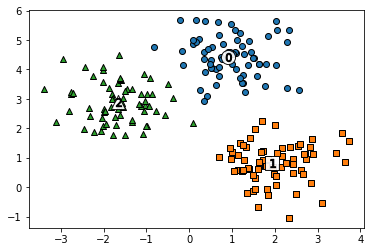

In [ ]:
# MeanShift 시각화
markers = ['o','s','^','P','D','H','x']

df['label'] = labels
centers = meanshift.cluster_centers_

for label in list(np.unique(labels)):
  label_cluster = df[df['label']==label]
  centers_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker=markers[label], edgecolors='k')

  # 군집별 중심위치 시각화
  plt.scatter(x=centers_x_y[0], y=centers_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
  plt.scatter(x=centers_x_y[0], y=centers_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(df.groupby('target')['label'].value_counts())

target  label
0       0        67
1       1        67
2       2        66
Name: label, dtype: int64


## GMM(Gaussian Mixture Model)

- 데이터 셋을 구성하는 여러 개의 정규분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정하는 방식
- 모수추정- 개별 정규 분포의 평균과 분산 / 각 데이터가 어떤 정규분포에 해당하는지의 확률

- 장점 : GMM의 경우 Kmeans보다 유연하게 다양한 데이터 세트에 적용할 수 있다.(K-means는 원의 분포를 보이는 데이터에 대해서는 잘 군집화하지만 길쭉한 차원형에 대해서는 제대로 군집하지 못함)
- 단점 : 군집화를 위한 시간이 오래걸린다.

---

**주요 파라미터**
- n_components -> gaussian mixture의 모델의 총 개수, 군집의 개수를 정하는데 중요한 역할을 한다. 

In [ ]:
from sklearn.mixture import GaussianMixture

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_labels = gmm.predict(iris.data)

df['labels'] = gmm_labels

result = df.groupby('target')['labels'].value_counts()
print(result)

# 아이리스 데이터에 대해서는 K-means 보다 더 좋은 성능을 보인다.

target  labels
0       0         50
1       1         45
        2          5
2       2         50
Name: labels, dtype: int64


## DBSCAN

- 밀도기반 군집화의 대표적인 알고리즘
- 간단하고 직관적인 알고리즘이지만 특정 공간 내에 데이터 밀도 차이를 기반한 알고리즘으로 복잡하고 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.
- 군집의 개수를 알고리즘에 따라 자동으로 지정


---



---


**주요 파라미터**
- eps : 개별 데이터를 중심으로 엡실론 반경을 가진 원형의 영역, 일반적으로 1이하의 값을 설정, 
-*eps 값이 증가하면 노이즈 데이터 수가 감소*

- min_samples : 엡실론 주변 영역 내에 포함되어야 할 데이터의 최소개수(자신의 데이터 포함)
-*min_samples 값이 증가하면 노이즈 데이터 수가 증가*

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

df['dbscan_label'] = dbscan_labels

result = df.groupby('target')['dbscan_label'].value_counts()
print(result)

# -1은 노이즈 데이터

# 아이리스 데이터는 3개의 범주 이지만 DBSCAN을 통해 2개의 군집으로 나뉘어짐

target  dbscan_label
0        0              49
        -1               1
1        1              46
        -1               4
2        1              42
        -1               8
Name: dbscan_label, dtype: int64


## 계층적 군집화

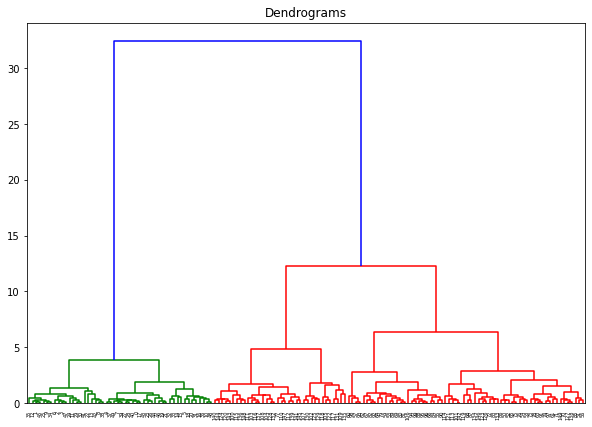

In [ ]:
iris = load_iris()
iris_data = iris.data

# 덴드로그램 그리기
from scipy.cluster import hierarchy
plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = hierarchy.dendrogram(hierarchy.linkage(iris_data, method='ward')) # 메소드 변경 가능

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# 한번 군집이 결정되면 바뀌는 일이 없음

# 유클리디안 거리에 와드 연결은 각 군집의 개수가 비슷하게 나온다. 희소 행렬에서는 jaccard / average 사용(군집의 개수가 일정하진 않음)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(iris_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

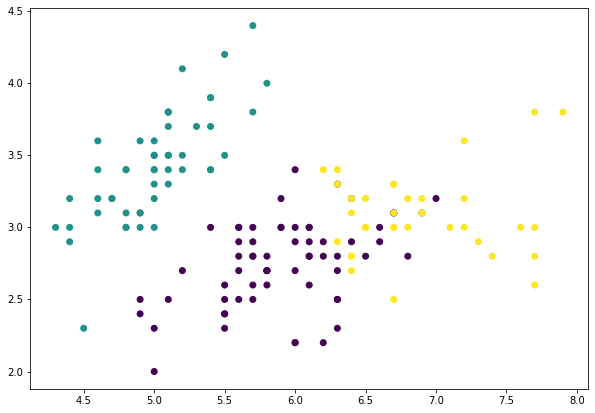

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(iris_data[:,0], iris_data[:,1], c=cluster.labels_)

In [ ]:
# 기존 데이터에 군집 예측값 붙이기
iris_df2 = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df2['cluster'] = cluster.labels_
iris_df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# 각 군집의 특징을 알 수 있음, 데이터프레임의 groupby().mean() 이용 
iris_df2.groupby(by='cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.920313,2.751563,4.420313,1.434375
1,5.006000,3.428000,1.462000,0.246000
2,6.869444,3.086111,5.769444,2.105556


# 군집화 실습 - 고객 세그먼테이션